In [ ]:
import pandas as pd
import numpy as np
import random as rnd
import seaborn as sns
import matplotlib.font_manager as fm
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import preprocessing
from random import sample
import matplotlib.colors as pltc
import numpy as np
import pandas as pd
from pandas_profiling import ProfileReport
%matplotlib inline
plt.rcParams['figure.figsize']=(15,8)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn import metrics
import statsmodels.api as sm 

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
data=pd.read_excel('boston_house(type).xlsx')

In [ ]:
data.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PRICE TYPE
0,0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,2
1,1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,2
2,2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,2
3,3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,2
4,4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,2


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    int64  
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    int64  
 10  TAX         506 non-null    int64  
 11  PTRATIO     506 non-null    float64
 12  B           506 non-null    float64
 13  LSTAT       506 non-null    float64
 14  PRICE       506 non-null    float64
 15  PRICE TYPE  506 non-null    int64  
dtypes: float64(11), int64(5)
memory usage: 63.4 KB


In [ ]:
data['PRICE TYPE'] = data['PRICE TYPE'].apply(lambda x:0 if x == 1 else 1)

In [ ]:
y = data["PRICE TYPE"]
X = data.drop(["Unnamed: 0","PRICE TYPE","PRICE"],axis = 1)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4,random_state=5)

LR = LogisticRegression()
LR.fit(X_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
LR_pred= LR.predict(X_train)
print(confusion_matrix(y_train,LR_pred))
print("======================================================\n")
print(classification_report(y_train,LR_pred))

[[104  21]
 [ 15 163]]

              precision    recall  f1-score   support

           0       0.87      0.83      0.85       125
           1       0.89      0.92      0.90       178

    accuracy                           0.88       303
   macro avg       0.88      0.87      0.88       303
weighted avg       0.88      0.88      0.88       303



In [ ]:
LR_pred= LR.predict(X_test)
print(confusion_matrix(y_test,LR_pred))
print("======================================================\n")
print(classification_report(y_test,LR_pred))

[[ 72  18]
 [ 11 102]]

              precision    recall  f1-score   support

           0       0.87      0.80      0.83        90
           1       0.85      0.90      0.88       113

    accuracy                           0.86       203
   macro avg       0.86      0.85      0.85       203
weighted avg       0.86      0.86      0.86       203



In [ ]:
from sklearn.metrics import confusion_matrix
pre_test_prob=pd.DataFrame(LR.predict_proba(X_test))

0.216


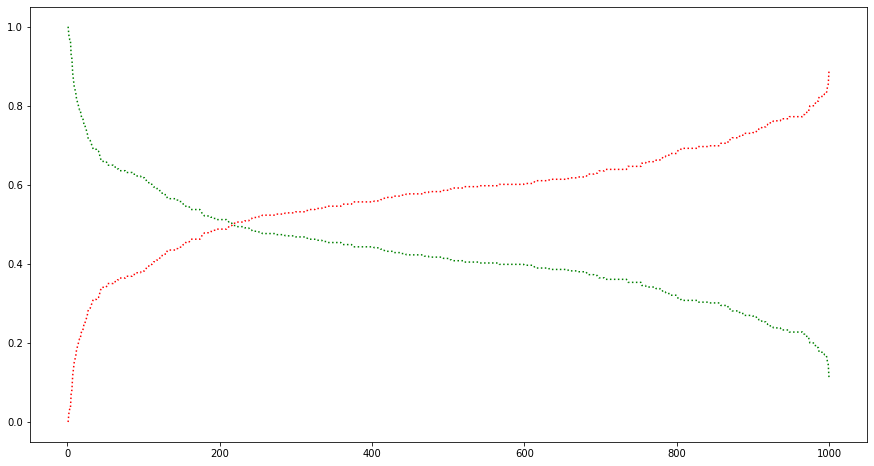

In [ ]:
tp_p_list = []
fn_p_list = []
for i in range(1000):
  pre_test=pre_test_prob[0].apply(lambda x: 0 if x*1000>i else 1)
  tp = confusion_matrix(pre_test,y_test)[0,0]
  fn = confusion_matrix(pre_test,y_test)[1,1]
  tp_precision = tp/(tp+fn)
  fn_precision = fn/(tp+fn)    
  if -0.001< (tp/(tp+fn))-(fn/(tp+fn)) <0.001:
    print(i/1000)
  else:
    pass
  tp_p_list.append(tp_precision)
  fn_p_list.append(fn_precision)
plt.plot([i for i in range(1,1001)], tp_p_list, 'g:')   
plt.plot([i for i in range(1,1001)], fn_p_list, 'r:')


In [ ]:
p = 0.216
pre_t=pre_test_prob[0].apply(lambda x: 0 if x>p else 1)

In [ ]:
from sklearn import metrics
print(metrics.classification_report(y_test,pre_t))

              precision    recall  f1-score   support

           0       0.75      0.94      0.84        90
           1       0.94      0.75      0.84       113

    accuracy                           0.84       203
   macro avg       0.85      0.85      0.84       203
weighted avg       0.86      0.84      0.84       203



In [ ]:
#載入統計分析模型套件，定義自變數與依變數
import statsmodels.api as sm 
import pandas as pd  
# defining the dependent and independent variables 
ytrain = data["PRICE TYPE"] 
Xtrain = data.drop(["Unnamed: 0","PRICE TYPE","PRICE"],axis = 1) 

In [ ]:
log_reg = sm.Logit(ytrain, Xtrain).fit() 
print(log_reg.summary())

Optimization terminated successfully.
         Current function value: 0.267790
         Iterations 9
                           Logit Regression Results                           
Dep. Variable:             PRICE TYPE   No. Observations:                  506
Model:                          Logit   Df Residuals:                      493
Method:                           MLE   Df Model:                           12
Date:                Wed, 10 Nov 2021   Pseudo R-squ.:                  0.6072
Time:                        12:23:08   Log-Likelihood:                -135.50
converged:                       True   LL-Null:                       -345.00
Covariance Type:            nonrobust   LLR p-value:                 3.562e-82
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
CRIM          -0.0829      0.074     -1.126      0.260      -0.227       0.061
ZN             0.0204      0.